# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [85]:
#Your code here

lower_columns = [column.lower() for column in df.columns] # Doesn't matter if I use column or another word, as long as it's consistant
lower_columns

# Must save it to df.columns if I want to actually change it in the dataframe

['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits                                                               ']

## Change the Index to be the Line Names

In [86]:
#Your code here

df = df.set_index('LINENAME') # Type it lowercase since I changed all columns to lowercase in above cell
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
LINENAME,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [87]:
# Your code here

df = df.reset_index()
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [88]:
# Your code here

df["Num_Lines"] = df.LINENAME.map(lambda x: len(x))
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name

In [89]:
def clean(col_name):
    cleaned = col_name.strip() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

# I actually Googled my way to this one! Hurray me.

In [90]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [91]:
# Checking the output, we can see the results.
df.columns

Index(['LINENAME', 'C/A', 'UNIT', 'SCP', 'STATION', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

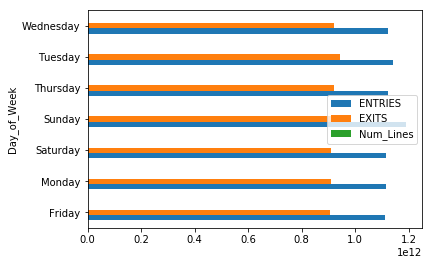

In [92]:
# Your code here

df.DATE = pd.to_datetime(df.DATE)
df["Day_of_Week"] = df.DATE.dt.day_name()

grouped = df.groupby('Day_of_Week').sum()
grouped.plot(kind='barh')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

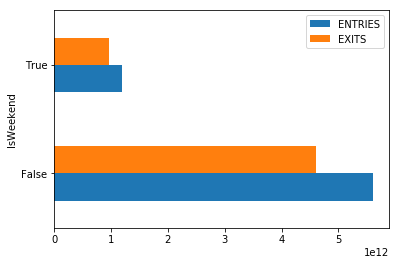

In [94]:
#Your code here

grouped = grouped.reset_index()
grouped.head()

grouped['IsWeekend'] = grouped.Day_of_Week.map({"Sunday":True,"Monday":False,"Tuesday":False,"Wednesday":False,"Thursday":False,"Friday":False,"Sunday":True})
wkend = grouped.groupby('IsWeekend').sum()
wkend[['ENTRIES', 'EXITS']].plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [95]:
# Your answer here 

# The raw data for entries/exits is cumulative. (In other words, one day's entries/exits piles on top of the
# previous day's. So simply summing the data causes it to be out of whack.) Use mean() instead of sum() for a better picture

# As such, you would first need to order the data by time and station, 
# and then calculate the difference in order to produce meaningful aggregations.

## Drop a couple of columns

In [97]:
# Your code here

df = df.drop(["DIVISION", "C/A"], axis=1) #If you don't pass the axis=1 parameter, pandas will try and drop a row with the specified index
df.head()

,LINENAME,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines,Day_of_Week
0,NQR456W,R051,02-00-00,59 ST,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,R051,02-00-00,59 ST,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,NQR456W,R051,02-00-00,59 ST,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,NQR456W,R051,02-00-00,59 ST,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,NQR456W,R051,02-00-00,59 ST,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday


## Summary

Great! You practiced your data cleanup-skills using Pandas.